# Dataset 2 - Heart Disease 2020

In [190]:
#imports
import pandas as pd
import numpy as np
from sklearn import datasets, svm, tree, preprocessing, metrics
import statistics

## 1. Downloading and understanding the data

In [191]:
#First, the data is read with pandas, and the head of the data is viewed. 
df = pd.read_csv('datasets/heart_2020_cleaned.csv')
print(df2.shape)
df.head()

(319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [192]:
#The head showed different type of values, let's look at all the different types.
#There are no null values but many different types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [193]:
#By descibing the data, we see that BMI has a higher value than the rest. and Standard deviation is low for SleepTime.
#This means that we might have to standardize the data later, so it fits better with a model.
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'PhysicalHealth'}>],
       [<AxesSubplot:title={'center':'MentalHealth'}>,
        <AxesSubplot:title={'center':'SleepTime'}>]], dtype=object)

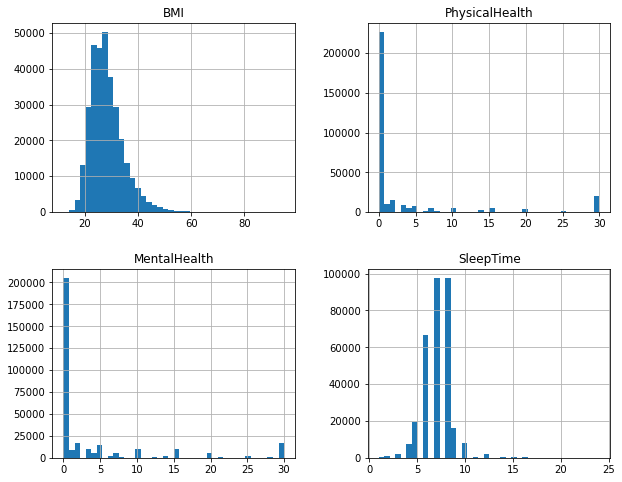

In [194]:
#Let's create a histogram, to get an idea of potentioal outliers, and knowlegde, by vizualising the data.
#The histogram show that there might be a few outliers on PhsycalHealth and MentalHealth, however the data might be imoprtant,
#since the context is health, and we want to look at people with high value for there parameters aswell.
df.hist(bins= 40, figsize=(10, 8))

<AxesSubplot:xlabel='BMI'>

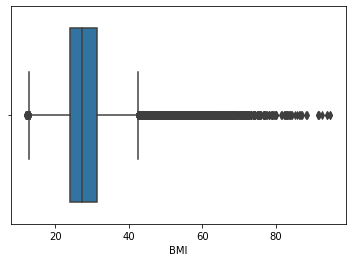

In [195]:
import seaborn as sns
#Looking at BMI, we can se an outlier with very low BMI, let's remove that.
sns.boxplot(x = df['BMI'])

<AxesSubplot:xlabel='BMI'>

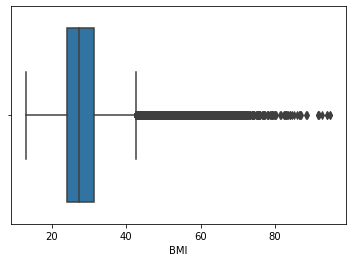

In [196]:
#SHOW COUNT OF < 13
df.drop(df.index[df['BMI'] < 13], inplace=True)
sns.boxplot(x = df['BMI'])

## 2. Data preparation

In [198]:
#Now we encode the object values from Object to Integer or float, so it fits with machine learning alhorithms.

#Function to encode 'Yes/No' to '1/0'.
def boolEncode(s):
    result = s.map(dict(Yes=1, No=0))
    return result

#Function to encode age from Category to mean of individual category range.
def ageEncode(s):
    result = []
    for i in s:
        if ("-" in str(i)):
            split = i.split("-")
            newAge = statistics.mean([int(split[0]), int(split[1])])
        else:
            newAge = 80
            
        result.append(newAge)   
    
    return result

#Function to preprocess a dataframe, and return a copy of encoded df.
def preprocessor(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    #LabelEncode categorical data.
    processed_df.Sex = le.fit_transform(df.Sex)
    processed_df.Race = le.fit_transform(df.Race)
    processed_df.GenHealth = le.fit_transform(df.GenHealth)
    #Encode 'Yes/No' to '1/0'
    processed_df.HeartDisease = boolEncode(df.HeartDisease)
    processed_df.Smoking = boolEncode(df.Smoking)
    processed_df.AlcoholDrinking = boolEncode(df.AlcoholDrinking)
    processed_df.Stroke = boolEncode(df.Stroke)
    processed_df.DiffWalking = boolEncode(df.DiffWalking)
    processed_df.Diabetic = boolEncode(df.Diabetic)
    processed_df.PhysicalActivity = boolEncode(df.PhysicalActivity)
    processed_df.Asthma = boolEncode(df.Asthma)
    processed_df.KidneyDisease = boolEncode(df.KidneyDisease)
    processed_df.SkinCancer = boolEncode(df.SkinCancer)
    #Encode the age to mean of category
    processed_df.AgeCategory = ageEncode(df.AgeCategory)
    return processed_df


p_df = preprocessor(df)

In [110]:
#Looking at the new types, we see that they are all of type int64 or float64, which means that it is ready for further evaluation.
p_df.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int32
AgeCategory           int64
Race                  int32
Diabetic            float64
PhysicalActivity      int64
GenHealth             int32
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

## 3. Splitting the data into training and test set

In [116]:
#We need to have a training and a test set, so we can train a model, and test it.
#In this case, we splitting the data into 80% training, and 20% test.
#from sklearn.model_selection import train_test_split
#train_set, test_set = train_test_split(p_df, test_size=0.2, random_state=42)
#print(len(train_set), "train +", len(test_set), "test")

255836 train + 63959 test


## 4. vizualising the data to gain insights

In [117]:
#First we copy the train and test set into new variables
#heart = train_set.copy()
#heart_test = test_set.copy()

<AxesSubplot:xlabel='AgeCategory', ylabel='HeartDisease'>

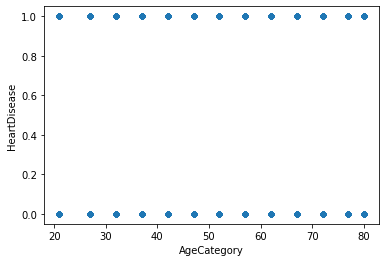

In [128]:
import matplotlib.pyplot as plt
#alpha highlighst the density
heart.plot(kind="scatter", x="AgeCategory", y="HeartDisease")

In [122]:
#Let's look at the correlations for the Heart disease
corr_matrix = heart.corr()
corr_matrix["HeartDisease"].sort_values(ascending=False)

HeartDisease        1.000000
AgeCategory         0.231388
DiffWalking         0.202147
Stroke              0.194949
Diabetic            0.188987
PhysicalHealth      0.171283
KidneyDisease       0.145840
Smoking             0.107845
SkinCancer          0.093149
Sex                 0.072051
BMI                 0.052843
Asthma              0.040402
Race                0.034098
MentalHealth        0.027226
SleepTime           0.007824
GenHealth          -0.010492
AlcoholDrinking    -0.032734
PhysicalActivity   -0.100227
Name: HeartDisease, dtype: float64

array([[<AxesSubplot:xlabel='HeartDisease', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='AgeCategory', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='DiffWalking', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='Stroke', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='Diabetic', ylabel='HeartDisease'>],
       [<AxesSubplot:xlabel='HeartDisease', ylabel='AgeCategory'>,
        <AxesSubplot:xlabel='AgeCategory', ylabel='AgeCategory'>,
        <AxesSubplot:xlabel='DiffWalking', ylabel='AgeCategory'>,
        <AxesSubplot:xlabel='Stroke', ylabel='AgeCategory'>,
        <AxesSubplot:xlabel='Diabetic', ylabel='AgeCategory'>],
       [<AxesSubplot:xlabel='HeartDisease', ylabel='DiffWalking'>,
        <AxesSubplot:xlabel='AgeCategory', ylabel='DiffWalking'>,
        <AxesSubplot:xlabel='DiffWalking', ylabel='DiffWalking'>,
        <AxesSubplot:xlabel='Stroke', ylabel='DiffWalking'>,
        <AxesSubplot:xlabel='Diabetic', ylabel='DiffWalking'>],
       [<AxesSubplot:xl

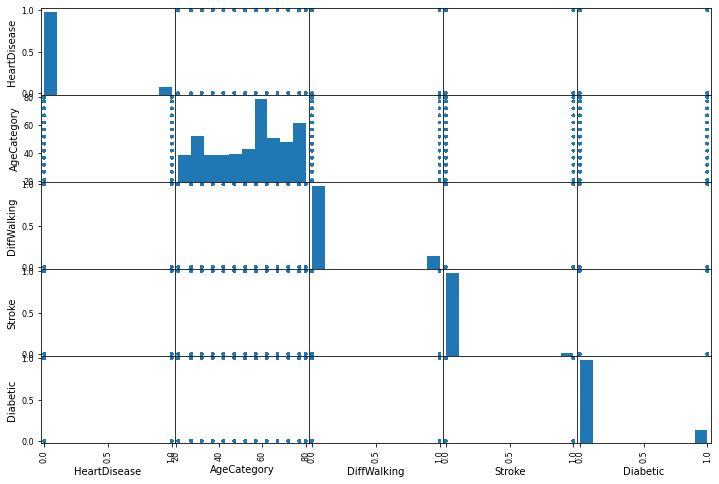

In [126]:
from pandas.plotting import scatter_matrix
attributes = ["HeartDisease","AgeCategory", "DiffWalking", "Stroke", "Diabetic"]
scatter_matrix(heart[attributes], figsize=(12, 8))

In [ ]:
#BAYES CLASSIFICATION?